In [1]:
import holoviews as hv
import datashader as ds
import pandas as pd
import numpy as np
from holoviews.operation.datashader import datashade, dynspread
from tqdm import tqdm
from datasets import load_dataset, get_dataset_config_names
import panel as pn
pn.extension()

import os

from holoviews import opts
from holoviews.streams import RangeXY, Selection1D
from datashader import transfer_functions as tf


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
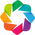

In [2]:
hv.extension('bokeh')

In [3]:

parquet_path = './wikimap.parquet'
if not os.path.exists(parquet_path):
    np_positions = np.load('./low_d.npy')
    coords = pd.DataFrame(np_positions, columns=['x', 'y'])

    subsets = sorted(get_dataset_config_names("wikimedia/wikipedia"))

    df_list = []
    for i, subset in tqdm(enumerate(subsets), desc="Loading subsets"):
        ds = load_dataset("wikimedia/wikipedia", subset)
        df_list.append(pd.DataFrame({
            'title': ds['train']['title'],
            'subset': subset,
            'url': ds['train']['url'],
            'wid': ds['train']['id']
        }))
    meta = pd.concat(df_list, ignore_index=True)
    # Combine the metadata with coordinates
    data = pd.concat([coords, meta], axis=1)

    data.to_parquet(parquet_path)
else:
    print(f"File already exists at {parquet_path}")



File already exists at ./wikimap.parquet


In [4]:
# Load the data from the parquet file
data = pd.read_parquet(parquet_path)

In [5]:
data.head()

,x,y,title,subset,url,wid
0,-74.382103,259.878510,Аԥсуа бызшәа,20231101.ab,https://ab.wikipedia.org/wiki/%D0%90%D4%A5%D1%...,807
1,-74.580994,259.981293,Аҟәа,20231101.ab,https://ab.wikipedia.org/wiki/%D0%90%D2%9F%D3%...,1040
2,-270.739716,486.283691,Аԥсуа алфавит,20231101.ab,https://ab.wikipedia.org/wiki/%D0%90%D4%A5%D1%...,1044
3,-74.554779,259.965332,Гагра,20231101.ab,https://ab.wikipedia.org/wiki/%D0%93%D0%B0%D0%...,1046
4,-74.614174,259.980438,Аԥсны Аҳәынҭқарра,20231101.ab,https://ab.wikipedia.org/wiki/%D0%90%D4%A5%D1%...,1053


In [8]:
from datashader import count
# Filter for just English and French data
en_data = data[data['subset'] == '20231101.en']
fr_data = data[data['subset'] == '20231101.fr']

# Create points for each language
en_points = hv.Points(en_data, kdims=['x', 'y'])
fr_points = hv.Points(fr_data, kdims=['x', 'y'])

# Create shaded plots with different colors
en_shaded = datashade(en_points, cmap=['#e6e6ff', '#0000ff'], aggregator=count()) # Light blue to blue
fr_shaded = datashade(fr_points, cmap=['#ffe6e6', '#ff0000'], aggregator=count()) # Light red to red

en_subset = en_data.sample(100000)
fr_subset = fr_data.sample(100000)
en_hoverable_points = hv.Scatter(en_subset, kdims=['x', 'y'], vdims=['title']).opts(
    color="white",
    size=8,
    alpha=0,
    tools=['hover'],  # Add 'tap' tool for click interaction
    width=1200,
    height=1200,
    hover_line_color="black",
    hover_fill_color="orange",
)

fr_hoverable_points = hv.Scatter(fr_subset, kdims=['x', 'y'], vdims=['title']).opts(
    color="white",
    size=8,
    alpha=0,
    tools=['hover'],  # Add 'tap' tool for click interaction
    width=1200,
    height=1200,
    hover_line_color="black",
    hover_fill_color="orange",
)


# Combine the plots
combined = en_shaded * fr_shaded

# Add dynamic spreading
spread_combined = dynspread(combined, threshold=0.9, max_px=500)

# Overlay shaded plot with hoverable and clickable subset
layout = spread_combined * en_hoverable_points * fr_hoverable_points

# Set plot options
plot = layout.opts(
    width=1200,
    height=1200,
    title="",
    xaxis=None,
    yaxis=None,
    show_grid=False,
    show_frame=False,
)

# Serve the plot
pn.serve(plot)

ValueError: Unexpected option 'position' for Scatter type across all extensions. Similar options for current extension ('bokeh') are: ['colorbar_position', 'legend_position', 'projection'].

In [ ]:
#Overall plot
from datashader import count

points = hv.Points(data, kdims=['x', 'y'])

shaded = datashade(points, cmap='Plasma', aggregator=count())

spread_shaded = dynspread(shaded, threshold=0.9, max_px=500)  # Adjust 'max_px' for larger point size

spread_shaded.opts(
    width=1200,
    height=1200,
    title="",
    xaxis=None,
    yaxis=None,
    show_grid=False,
    show_frame=False,
)

pn.serve(spread_shaded)

In [ ]:

#For exploring a subset

subset = data.sample(100000)  # Adjust the sample size as needed

points = hv.Points(data, kdims=['x', 'y'])
shaded = datashade(points, cmap='Plasma', aggregator=ds.count())
spread_shaded = dynspread(shaded, threshold=0.9, max_px=500)

hoverable_points = hv.Scatter(subset, kdims=['x', 'y'], vdims=['title', 'url']).opts(
    color="white",
    size=8,
    alpha=0,
    tools=['hover', 'tap'],  # Add 'tap' tool for click interaction
    width=1200,
    height=1200,
    hover_line_color="black",
    hover_fill_color="orange"
)

selection = Selection1D(source=hoverable_points)

# Overlay shaded plot with hoverable and clickable subset
layout = spread_shaded * hoverable_points

# Set options for layout
layout.opts(
    title="",
    xaxis=None,
    yaxis=None,
    show_grid=False,
    show_frame=False
)

# Create a Panel server to display the plot
pn.serve(layout)

In [ ]:
# Assuming 'data' is your DataFrame with a 'subset' column
en_data = data[data['subset'].str.endswith('.en')]
print(len(en_data))

In [ ]:
# Create a list of articles to search for
articles = ['Gaia', 'Apollonian and Dionysian', 'Mount Olympus']

# Initialize a dictionary to store coordinates
article_coords = {}

# Find coordinates for each article
for article in articles:
    # Search for articles containing the substring
    matching_articles = en_data[en_data['title'].str.contains(article, case=False, na=False)]
    
    if not matching_articles.empty:
        print(f"\nFound {len(matching_articles)} articles containing '{article}':")
        # Sort matching articles by title length and get first 3
        matching_articles = matching_articles.assign(title_len=matching_articles['title'].str.len())
        matching_articles = matching_articles.sort_values('title_len').head(3)
        for _, row in matching_articles.iterrows():
            print(f"Title: {row['title']}")
            print(f"x: {row['x']:.6f}")
            print(f"y: {row['y']:.6f}")
            print("---")
    article_data = en_data[en_data['title'] == article]
    
    if not article_data.empty:
        article_coords[article] = {
            'x': article_data['x'].values[0],
            'y': article_data['y'].values[0]
        }
    else:
        print(f"No article titled '{article}' found in English subsets")

# Print coordinates for found articles        
for article, coords in article_coords.items():
    print(f"\nCoordinates for '{article}' article:")
    print(f"x: {coords['x']:.6f}")
    print(f"y: {coords['y']:.6f}")


# Find coordinates for "Gaia" article in English subsets
gaia_coords = en_data[en_data['title'] == 'Gaia']



In [ ]:
#Most zoomed out rectangle view

points = hv.Points(data, kdims=['x', 'y'])
shaded = datashade(points, cmap='Plasma', aggregator=ds.count())
spread_shaded = dynspread(shaded, threshold=0.9, max_px=500)

# Define rectangle dimensions and location within the data bounds
x_min, x_max = data['x'].min(), data['x'].max()
y_min, y_max = data['y'].min(), data['y'].max()

# Get Gaia article coordinates
gaia_coords = en_data[en_data['title'] == 'Gaia']
rect_x = gaia_coords['x'].values[0] if not gaia_coords.empty else (x_min + x_max) / 2
rect_y = gaia_coords['y'].values[0] if not gaia_coords.empty else (y_min + y_max) / 2
rect_width, rect_height = (x_max - x_min) * 0.05, (y_max - y_min) * 0.05 

# Create the rectangle
rectangle = hv.Rectangles([(rect_x - rect_width / 2, rect_y - rect_height / 2, 
                            rect_x + rect_width / 2, rect_y + rect_height / 2)]).opts(
    line_color='green', line_width=10, fill_alpha=0  # Red border, transparent fill
)

# Full-view plot with rectangle overlay
annotated_plot = (spread_shaded * rectangle).opts(
    width=1200, height=1200, title="", xaxis=None, yaxis=None,
    show_grid=False, show_frame=False, bgcolor='white',
    xlim=(x_min, x_max), ylim=(y_min, y_max)  # Full data view
)


# Display using Panel
pn.serve(annotated_plot)


In [ ]:
import math
import holoviews as hv
import panel as pn
from holoviews.operation.datashader import datashade, dynspread
import datashader as ds

hv.extension('bokeh')

# Define coordinates for centers
apollo_coords = [69.5, -152.5]
ares_coords = [72.4, -151.2]
homer_coords = [66, -168]
circle_coords =  homer_coords

# Calculate zoomed view bounds
zoom_width = rect_width 
zoom_height = rect_height 
zoom_x_min = rect_x - zoom_width / 2
zoom_x_max = rect_x + zoom_width / 2
zoom_y_min = rect_y - zoom_height / 2 
zoom_y_max = rect_y + zoom_height / 2
rect_width, rect_height = (zoom_x_max - zoom_x_min) * 0.05, (zoom_y_max - zoom_y_min) * 0.05

# Define the area of the rectangle to match the other shapes' areas
rect_area = rect_width * rect_height

# Calculate the side length of an equilateral triangle with the same area as the rectangle
triangle_side = math.sqrt((4 * rect_area) / math.sqrt(3))

circle_radius = math.sqrt(rect_area / math.pi) * 4 

# Define main points and shading
points = hv.Points(data, kdims=['x', 'y'])
shaded = datashade(points, cmap='Plasma', aggregator=ds.count())
zoom_shaded = dynspread(shaded, threshold=0.9, max_px=1000)

# Define rectangle, triangle, and circle with matching areas
new_rectangle = hv.Rectangles([(homer_coords[0] - rect_width / 2, homer_coords[1] - rect_height / 2, 
                             homer_coords[0] + rect_width / 2, homer_coords[1] + rect_height / 2)]).opts(
    line_color='green', line_width=10, fill_alpha=0  
)

# Define an equilateral triangle centered at `ares_coords`
half_side = triangle_side / 4
triangle_height = math.sqrt(3) * half_side
triangle = hv.Path([[
    (ares_coords[0] - half_side, ares_coords[1] - triangle_height / 3),
    (ares_coords[0] + half_side, ares_coords[1] - triangle_height / 3),
    (ares_coords[0], ares_coords[1] + 2 * triangle_height / 3),
    (ares_coords[0] - half_side, ares_coords[1] - triangle_height / 3)
]]).opts(line_color='green', line_width=10)

# Define a circle centered at `apollo_coords`
circle = hv.Ellipse(circle_coords[0], circle_coords[1],  circle_radius).opts(line_color='green', line_width=10)

# Create zoomed plot with shapes
zoomed_plot = (zoom_shaded * new_rectangle * rectangle ).opts(
    width=1200, height=1200, title="", xaxis=None, yaxis=None,
    show_grid=False, show_frame=False, bgcolor='white',
    xlim=(zoom_x_min, zoom_x_max), ylim=(zoom_y_min, zoom_y_max)
)

# Display zoomed view
pn.serve(zoomed_plot)


In [ ]:
# Filter data points within the circle bounds
# Use distance formula from circle center to determine if points are inside

#filter data within the rectangle bounds
rectangle_filtered = data[
    (data['x'] >= homer_coords[0] - rect_width/2) & 
    (data['x'] <= homer_coords[0] + rect_width/2) &
    (data['y'] >= homer_coords[1] - rect_height/2) &
    (data['y'] <= homer_coords[1] + rect_height/2)
]

# Use HDBSCAN for clustering
import hdbscan

# Extract coordinates for clustering
X = rectangle_filtered[['x', 'y']].values

# Initialize and fit HDBSCAN
# Set random seed for reproducibility
np.random.seed(42)

clusterer = hdbscan.HDBSCAN(min_cluster_size=40, min_samples=40)
rectangle_filtered['cluster'] = clusterer.fit_predict(X)

# Print 10 examples from each cluster
unique_clusters = rectangle_filtered['cluster'].unique()


for cluster in unique_clusters:
    print(f"\nCluster {cluster}:, size: {len(rectangle_filtered[rectangle_filtered['cluster'] == cluster])}")
    cluster_data = rectangle_filtered[rectangle_filtered['cluster'] == cluster]
    print(cluster_data[['title', 'x', 'y']].head(10))


In [ ]:
cluster_number_to_title = {-1: 'Noise', 0: 'Hungarian Frog Taxonomy', 1:'Dutch Frog Taxonomy', 2: 'Homer', 3: 'The Illiad & Odyssey'}
# Map cluster numbers to more descriptive titles
cluster_labels = rectangle_filtered['cluster'].map(cluster_number_to_title)
rectangle_filtered['cluster_label'] = cluster_labels


In [15]:
# Update cluster labels for Batrachomyomachia articles
rectangle_filtered.loc[rectangle_filtered['title'] == 'Batrachomyomachia', 'cluster_label'] = 'Batrachomyomachia'
rectangle_filtered.loc[rectangle_filtered['title'] == 'Batrachomyomachia', 'cluster'] = 4


In [ ]:

import datamapplot
positions = rectangle_filtered[['x', 'y']].values
labels = rectangle_filtered['cluster_label'].astype(str)


#Filter out noise points (cluster -1)
#positions = positions[rectangle_filtered['cluster'] != -1]
#labels = labels[labels != "Noise"]

fig1, ax1 = datamapplot.create_plot(
    positions,
    labels=labels,
    noise_label="Noise",
    label_font_size=13,
    point_size=3,
    alpha=0.5,
    max_font_size=24,
    min_font_size=4,
    min_font_weight=100,
    max_font_weight=1000,
    label_wrap_width=8,
    label_over_points=False,
    force_matplotlib=True,
    dynamic_label_size=True,
    add_glow=False,
    marker_type='o',
    figsize=(10,10),
)

# Remove border
#ax1.spines['top'].set_visible(False)
#ax1.spines['right'].set_visible(False)
#ax1.spines['bottom'].set_visible(False)
#ax1.spines['left'].set_visible(False)



In [ ]:
# Get the majority subset for each cluster
cluster_subset_counts = rectangle_filtered.groupby(['cluster_label', 'subset']).size().unstack(fill_value=0)
majority_subsets = cluster_subset_counts.idxmax(axis=1)

print("\nMajority subset for each cluster:")
for cluster, subset in majority_subsets.items():
    count = cluster_subset_counts.loc[cluster, subset]
    total = cluster_subset_counts.loc[cluster].sum()
    percentage = (count/total) * 100
    print(f"Cluster {cluster}: {subset} ({count}/{total} articles, {percentage:.1f}%)")


In [32]:
clusters_of_interest = {}

In [ ]:
# Print all Batrachomyomachia articles
batrachomyomachia_articles = rectangle_filtered[rectangle_filtered['title'] == 'Batrachomyomachia']
print("\nBatrachomyomachia articles:")
print(batrachomyomachia_articles['subset'].unique())
print("\nWiki IDs:")
batrachomyomachia_locs = batrachomyomachia_articles[['wid', 'subset', 'title']]
print(batrachomyomachia_locs)
clusters_of_interest['Batrachomyomachia'] = batrachomyomachia_locs


In [ ]:
homer_articles = rectangle_filtered[
    (rectangle_filtered['title'] == 'Homer')
]

print("\nArticles in Homer cluster:")
homer_locs = homer_articles[['wid', 'subset', 'title']]
print(homer_locs)
clusters_of_interest['Homer'] = homer_locs

In [ ]:
illiad_articles = rectangle_filtered[
    (rectangle_filtered['title'].str.contains('Ilia', case=True, na=False))
]

print("\nArticles in Illiad cluster:")
illiad_locs = illiad_articles[['wid', 'subset', 'title']]
print(illiad_locs.to_string())

clusters_of_interest['Iliad'] = illiad_locs


In [ ]:
dutch_frog_articles = rectangle_filtered[
    (rectangle_filtered['cluster_label'] == 'Dutch Frog Taxonomy') &
    (rectangle_filtered['subset'].str.endswith('nl'))
]

print("\nArticles about Dutch Frog Taxonomy:")
dutch_frog_locs = dutch_frog_articles[['wid', 'subset', 'title']]
print(dutch_frog_locs.to_string())
clusters_of_interest['Dutch Frog Taxonomy'] = dutch_frog_locs


In [ ]:
hungarian_frog_articles = rectangle_filtered[
    (rectangle_filtered['cluster_label'] == 'Hungarian Frog Taxonomy') &
    (rectangle_filtered['subset'].str.endswith('hu'))
]

print("\nArticles about Hungarian Frog Taxonomy:")
hungarian_frog_locs = hungarian_frog_articles[['wid', 'subset', 'title']]
print(hungarian_frog_locs.to_string())
clusters_of_interest['Hungarian Frog Taxonomy'] = hungarian_frog_locs

In [23]:
from transformers import AutoTokenizer, AutoModel
import torch

# Load model and tokenizer once
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tokenizer = AutoTokenizer.from_pretrained("BAAI/bge-m3")
model = AutoModel.from_pretrained("BAAI/bge-m3").to(device)



In [24]:
def get_bge_embedding(text):
    # Tokenize and encode text
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
    # Move input tensors to GPU
    inputs = {k: v.to(device) for k, v in inputs.items()}
    
    # Get embeddings
    with torch.no_grad():
        outputs = model(**inputs)
        embeddings = outputs.last_hidden_state[:, 0, :] # Use CLS token embedding
        # Move back to CPU for numpy conversion
        embeddings = embeddings.cpu()
        
    return embeddings.numpy()[0] # Return numpy array


In [ ]:
from tqdm import tqdm

# Get embeddings for each cluster's titles
cluster_embeddings = {}
embedded_titles = {}
for cluster_name, articles in tqdm(clusters_of_interest.items(), desc="Processing clusters"):
    embeddings = []
    titles = []
    for _, row in tqdm(articles.iterrows(), desc=f"Getting embeddings for {cluster_name}", leave=False):
        embedding = get_bge_embedding(row['title'])
        embeddings.append(embedding)
        titles.append(row['title'])
    cluster_embeddings[cluster_name] = embeddings
    embedded_titles[cluster_name] = titles

cluster_embeddings['Athena'] = [get_bge_embedding('Athena')]
embedded_titles['Athena'] = ['Athena']
cluster_embeddings['Achilles'] = [get_bge_embedding('Achilles')]
embedded_titles['Achilles'] = ['Achilles']
cluster_embeddings['Hamptophryne'] = [get_bge_embedding('Hamptophryne')]
embedded_titles['Hamptophryne'] = ['Hamptophryne']

# Print number of embeddings for verification
for cluster_name, embeddings in cluster_embeddings.items():
    print(f"{cluster_name}: {len(embeddings)} embeddings")



In [ ]:
# Compute max dot product between each pair of clusters and store argmaxes
cluster_similarities = {}
cluster_argmaxes = {}  # Store which embeddings give max similarity

for cluster1 in cluster_embeddings:
    for cluster2 in cluster_embeddings:
        if cluster1 < cluster2:  # Only compute each pair once
            # Get all pairwise dot products between embeddings from both clusters
            max_similarity = float('-inf')
            max_i = max_j = 0
            for i, emb1 in enumerate(cluster_embeddings[cluster1]):
                for j, emb2 in enumerate(cluster_embeddings[cluster2]):
                    similarity = np.dot(emb1, emb2) / (np.linalg.norm(emb1) * np.linalg.norm(emb2))
                    if similarity > max_similarity:
                        max_similarity = similarity
                        max_i = i
                        max_j = j
            
            cluster_similarities[(cluster1, cluster2)] = max_similarity
            cluster_argmaxes[(cluster1, cluster2)] = (max_i, max_j)

# Print results with titles
for (c1, c2), similarity in cluster_similarities.items():
    i, j = cluster_argmaxes[(c1, c2)]
    title1 = embedded_titles[c1][i]
    title2 = embedded_titles[c2][j]
    print(f"{c1} - {c2}: {similarity:.3f}")
    print(f"  {title1} <-> {title2}")


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create a list of all unique cluster names
cluster_names = sorted(list(set([c for pair in cluster_similarities.keys() for c in pair])))

# Create a similarity matrix
n = len(cluster_names)
similarity_matrix = np.zeros((n, n))

# Fill the similarity matrix
for i, c1 in enumerate(cluster_names):
    for j, c2 in enumerate(cluster_names):
        if i == j:
            similarity_matrix[i,j] = 1.0  # Diagonal is always 1
        elif (c1, c2) in cluster_similarities:
            similarity_matrix[i,j] = cluster_similarities[(c1, c2)]
        elif (c2, c1) in cluster_similarities:
            similarity_matrix[i,j] = cluster_similarities[(c2, c1)]

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, 
            xticklabels=cluster_names,
            yticklabels=cluster_names,
            annot=True,  # Show numbers in cells
            fmt='.3f',   # Format numbers to 3 decimal places
            cmap='magma',
            vmin=0,
            vmax=1)

plt.title('Cluster Similarity Matrix')
plt.tight_layout()
plt.show()


In [ ]:
# Create a subset of clusters we want to show
selected_clusters = ['Achilles', 'Homer', 'Iliad', 'Hamptophryne']

# Get indices of selected clusters
selected_indices = [cluster_names.index(c) for c in selected_clusters]

# Create subset of similarity matrix
subset_matrix = similarity_matrix[selected_indices][:, selected_indices]
mask = np.eye(4, dtype=bool)
nondiag = [e for e in subset_matrix.flatten() if e < 1]
print(nondiag)
vmin = min(nondiag)-0.1
vmax = max(nondiag)+0.1


# Create heatmap for subset
plt.figure(figsize=(8, 6))
sns.heatmap(subset_matrix,
            mask=mask,
            xticklabels=selected_clusters,
            yticklabels=selected_clusters, 
            annot=True,
            fmt='.3f',
            cmap='magma',
            vmin=vmin,
            vmax=vmax)

plt.title('BGE-M3 Ambient Cosine Similarity')
plt.tight_layout()
plt.show()
